<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Fitting_Non_Linear_Models_Using_Polynomials_and_Step_Functions_for_Financial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

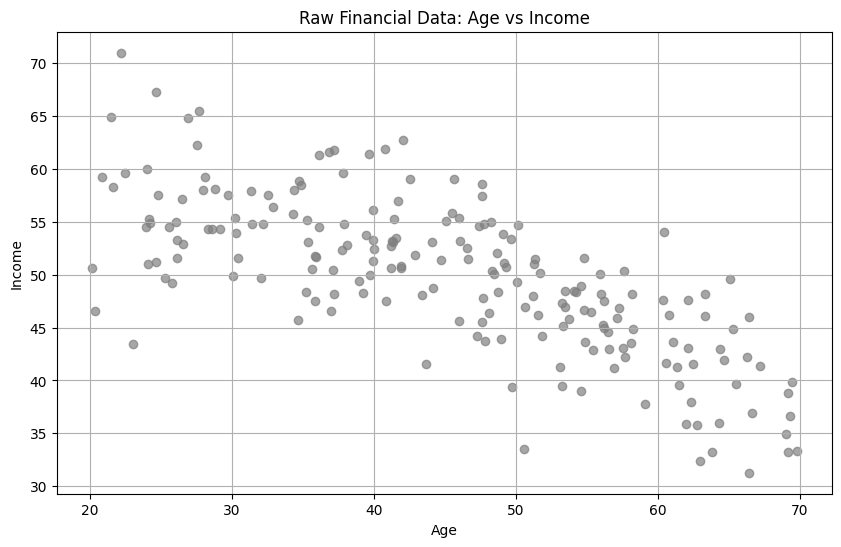


Fitting Polynomial Regression of Degree 1:


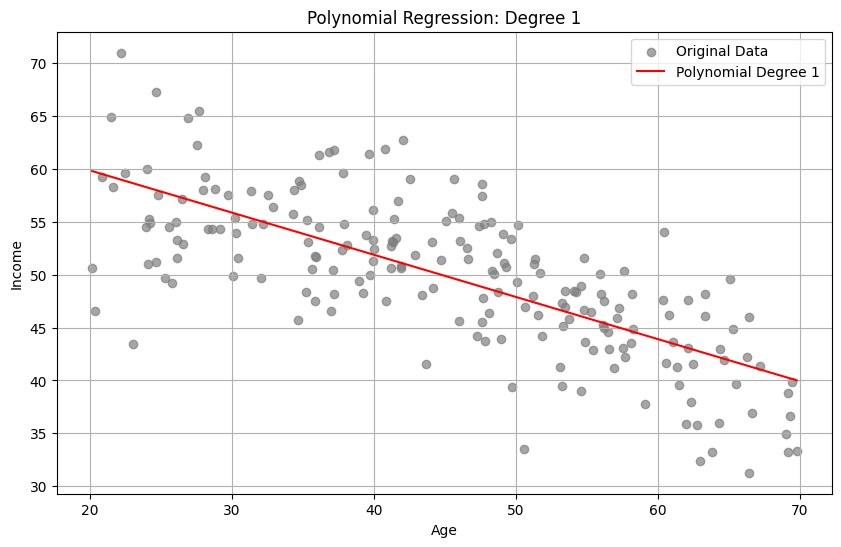

Degree 1: Mean Cross-Validated MSE: 24.9395

Fitting Polynomial Regression of Degree 2:


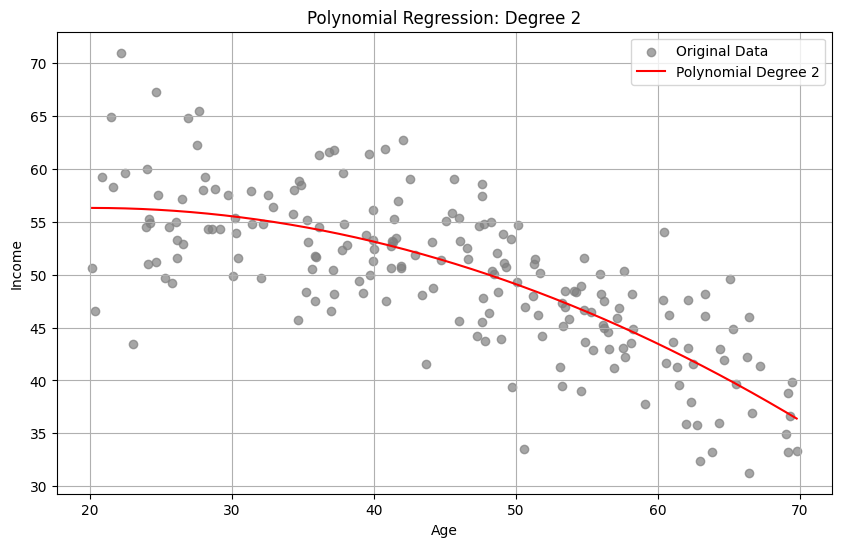

Degree 2: Mean Cross-Validated MSE: 22.9016

Fitting Polynomial Regression of Degree 3:


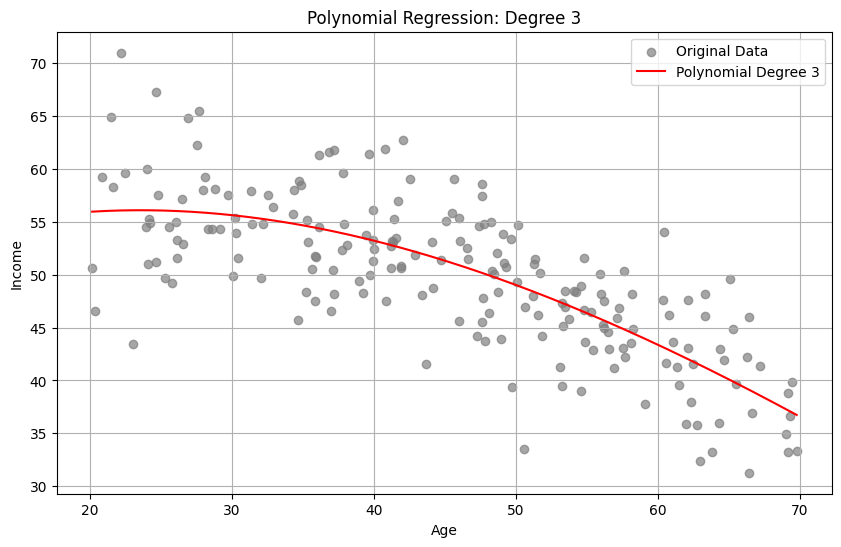

Degree 3: Mean Cross-Validated MSE: 23.0785

Fitting Polynomial Regression of Degree 5:


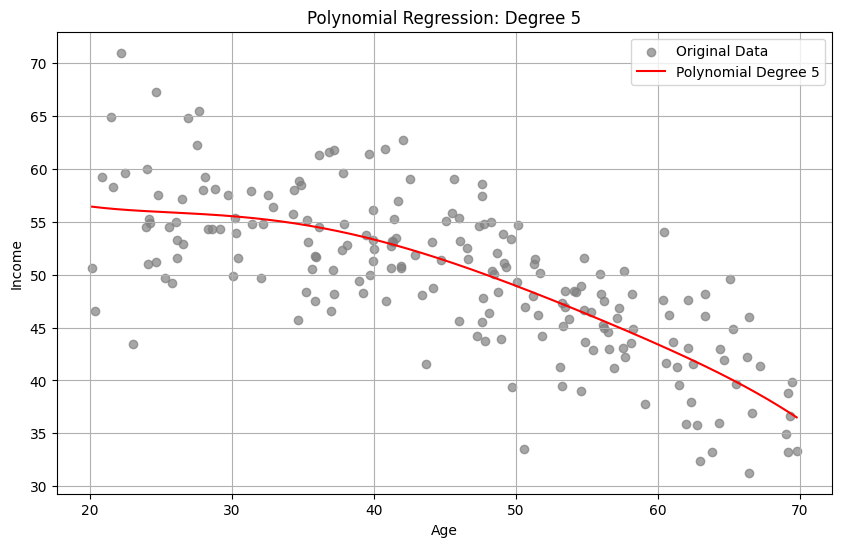

Degree 5: Mean Cross-Validated MSE: 23.7485

Fitting Step Function with 4 Intervals:


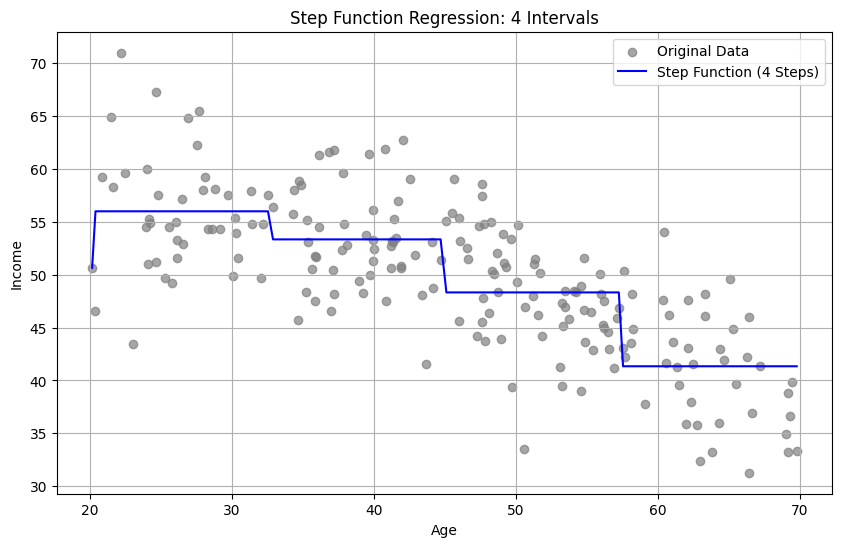

4 Steps: Mean Cross-Validated MSE: 1160173909730831350139715584.0000

Fitting Step Function with 6 Intervals:


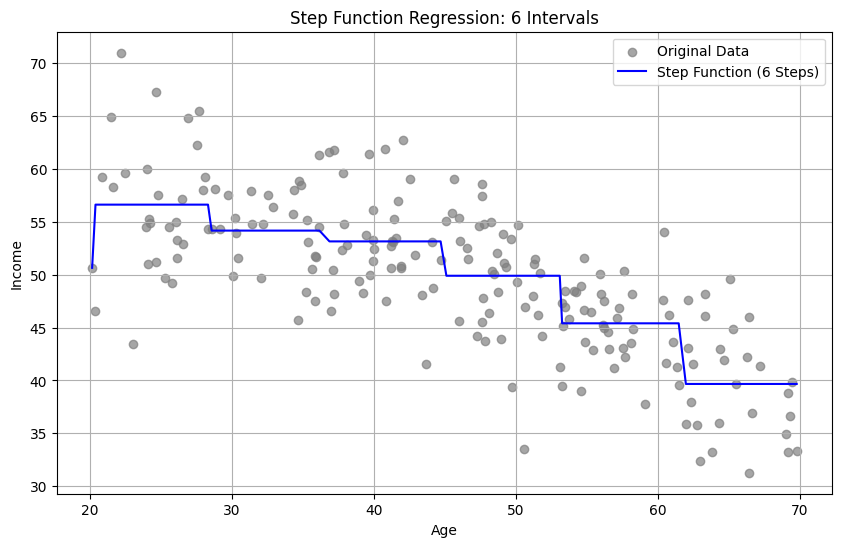

6 Steps: Mean Cross-Validated MSE: 10314539353382679326555635712.0000

Fitting Step Function with 8 Intervals:


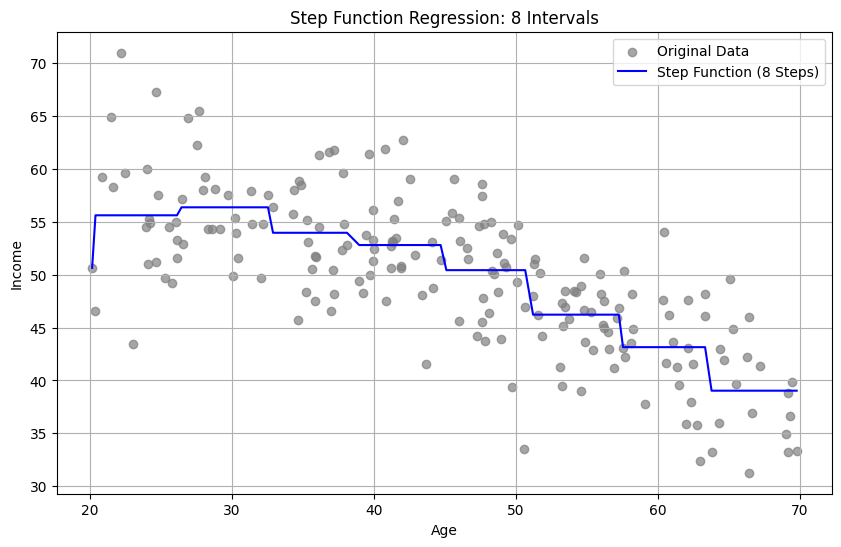

8 Steps: Mean Cross-Validated MSE: 10414663372731105764668604416.0000


In [1]:
# Step 1: Importing Libraries
# I started by importing essential libraries for data generation, polynomial transformations,
# regression modeling, and visualization. These tools allow me to introduce non-linearity
# into the models and evaluate their performance.
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Step 2: Generating Financial Data (Age vs. Income)
# I wanted to simulate a non-linear relationship between age (predictor) and income (response).
# This type of relationship is common in financial data—for example, income growth might accelerate
# during mid-career and decline post-retirement.

np.random.seed(123)  # Setting a seed to ensure reproducibility
n_samples = 200      # I generated 200 observations to provide sufficient variability

# Age ranges between 20 and 70 years
age = np.random.uniform(20, 70, n_samples)

# Simulating a non-linear relationship with noise
# I used a quadratic curve to define the base relationship and added random noise
income = 50 + 0.5 * age - 0.01 * age**2 + np.random.normal(scale=5, size=n_samples)

# Storing the data in a DataFrame for easier handling
data = pd.DataFrame({'Age': age, 'Income': income})

# Visualizing the raw data to confirm the non-linear relationship
# I wanted to see how income behaves across the age range.
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Income'], color='gray', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Raw Financial Data: Age vs Income")
plt.grid(True)
plt.show()

# Step 3: Polynomial Regression
# Polynomial regression is my first choice for introducing non-linearity.
# It allows me to fit smooth curves by adding polynomial terms (x^2, x^3, etc.)
# to a linear model. I need to balance flexibility and overfitting, so cross-validation
# will help me evaluate model performance.

def polynomial_regression(degree, X, Y):
    """
    Fits a polynomial regression model of specified degree and visualizes the results.
    I also calculate the cross-validated MSE to assess the model's performance.
    """
    # Step 3.1: Creating Polynomial Features
    # I use PolynomialFeatures to automatically generate powers of X (up to the specified degree).
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))

    # Step 3.2: Fitting the Linear Regression Model
    # Here, I am treating the transformed polynomial features as inputs to a linear model.
    model = LinearRegression()
    model.fit(X_poly, Y)

    # Step 3.3: Generating Predictions for Visualization
    # I want to see how the model fits across the full range of ages.
    X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    Y_pred = model.predict(poly.transform(X_range))

    # Step 3.4: Visualizing the Polynomial Fit
    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y, color='gray', alpha=0.7, label="Original Data")
    plt.plot(X_range, Y_pred, color='red', label=f"Polynomial Degree {degree}")
    plt.xlabel("Age")
    plt.ylabel("Income")
    plt.title(f"Polynomial Regression: Degree {degree}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Step 3.5: Evaluating Performance Using Cross-Validation
    # Cross-validation gives me a robust measure of model performance by estimating MSE on unseen data.
    cv_score = cross_val_score(model, X_poly, Y, scoring="neg_mean_squared_error", cv=5)
    print(f"Degree {degree}: Mean Cross-Validated MSE: {-cv_score.mean():.4f}")

# Testing Polynomial Models with Different Degrees
# I experimented with degrees 1 (linear), 2, 3, and 5 to understand how increasing
# model complexity affects the fit and performance.
for degree in [1, 2, 3, 5]:
    print(f"\nFitting Polynomial Regression of Degree {degree}:")
    polynomial_regression(degree, data['Age'].values, data['Income'].values)

# Step 4: Step Functions
# Step functions allow me to fit piecewise constant models by dividing the predictor
# into intervals. This method is ideal for capturing abrupt changes in financial data.

def step_function(intervals, X, Y):
    """
    Fits a step function model by dividing data into intervals and visualizes the results.
    I also calculate cross-validated MSE to assess model performance.
    """
    # Step 4.1: Binning the Predictor into Intervals
    # I split the Age predictor into 'intervals' and create dummy variables for each bin.
    X_binned = pd.cut(X, bins=intervals, labels=False)
    X_dummy = pd.get_dummies(X_binned, prefix="bin")  # Creating dummy variables for each interval

    # Step 4.2: Fitting the Linear Model
    # I treat the dummy variables as predictors in a simple linear regression.
    model = LinearRegression()
    model.fit(X_dummy, Y)

    # Step 4.3: Generating Predictions for Visualization
    X_sorted = np.sort(X)  # Sorting the data for cleaner visualization
    Y_pred = model.predict(pd.get_dummies(pd.cut(X_sorted, bins=intervals, labels=False), prefix="bin"))

    # Step 4.4: Visualizing the Step Function Fit
    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y, color='gray', alpha=0.7, label="Original Data")
    plt.plot(X_sorted, Y_pred, color='blue', label=f"Step Function ({len(intervals)-1} Steps)")
    plt.xlabel("Age")
    plt.ylabel("Income")
    plt.title(f"Step Function Regression: {len(intervals)-1} Intervals")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Step 4.5: Cross-Validation to Evaluate Performance
    X_dummy_full = pd.get_dummies(pd.cut(X, bins=intervals, labels=False), prefix="bin")
    cv_score = cross_val_score(model, X_dummy_full, Y, scoring="neg_mean_squared_error", cv=5)
    print(f"{len(intervals)-1} Steps: Mean Cross-Validated MSE: {-cv_score.mean():.4f}")

# Testing Step Functions with Different Numbers of Intervals
# I tested 4, 6, and 8 intervals to understand how the granularity of step functions
# influences the fit and MSE.
for intervals in [4, 6, 8]:
    print(f"\nFitting Step Function with {intervals} Intervals:")
    step_function(np.linspace(data['Age'].min(), data['Age'].max(), intervals + 1), data['Age'].values, data['Income'].values)
